In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
df=pd.read_csv('/home/kumar/Documents/time series/daily-total-female-births-CA.csv',index_col=[0],parse_dates=[0])
df.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [82]:
df.tail()

,births
date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


In [83]:
series_values=df.values

In [86]:
series_values

array([[35],
       [32],
       [30],
       [31],
       [44],
       [29],
       [45],
       [43],
       [38],
       [27],
       [38],
       [33],
       [55],
       [47],
       [45],
       [37],
       [50],
       [43],
       [41],
       [52],
       [34],
       [53],
       [39],
       [32],
       [37],
       [43],
       [39],
       [35],
       [44],
       [38],
       [24],
       [23],
       [31],
       [44],
       [38],
       [50],
       [38],
       [51],
       [31],
       [31],
       [51],
       [36],
       [45],
       [51],
       [34],
       [52],
       [47],
       [45],
       [46],
       [39],
       [48],
       [37],
       [35],
       [52],
       [42],
       [45],
       [39],
       [37],
       [30],
       [35],
       [28],
       [45],
       [34],
       [36],
       [50],
       [44],
       [39],
       [32],
       [39],
       [45],
       [43],
       [39],
       [31],
       [27],
       [30],
       [42],
       [46],

In [87]:
df.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


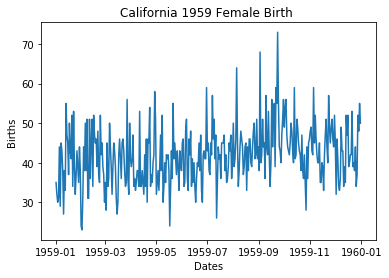

<Figure size 1080x504 with 0 Axes>

In [88]:
plt.plot(df.births)
plt.xlabel('Dates')
plt.ylabel('Births')
plt.title('California 1959 Female Birth ')
plt.figure(figsize=(15,7))
plt.show()

In [89]:
df_mean=df.rolling(window=20).mean()

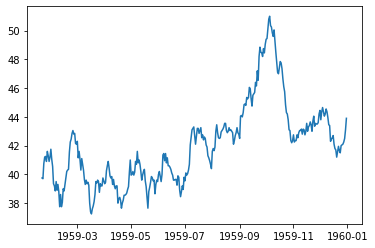

In [90]:
plt.plot(df_mean)

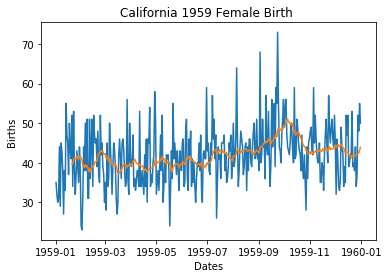

<Figure size 432x288 with 0 Axes>

In [91]:
plt.plot(df.births)
plt.plot(df_mean)
plt.xlabel('Dates')
plt.ylabel('Births')
plt.title('California 1959 Female Birth ')
plt.figure()
plt.show()

In [100]:
value=pd.DataFrame(series_values)

In [103]:
birth_df=pd.concat([value,value.shift(1)],axis=1)

In [104]:
birth_df.columns=['Actual_birth','Forecast_birth']
birth_df.head()

,Actual_birth,Forecast_birth
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [105]:
birth_test=birth_df[1:]
birth_test.head()

,Actual_birth,Forecast_birth
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0
5,29,44.0


In [106]:
from sklearn.metrics import mean_squared_error

In [107]:
birth_error=mean_squared_error(birth_test.Actual_birth,birth_test.Forecast_birth)

In [108]:
birth_error

84.22252747252747

In [109]:
np.sqrt(birth_error)

9.177283229394606

In [112]:
# ARIMA - AutoRegressive (p) Integration (d) MovingAverage (q)

In [111]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [113]:
# plot_acf is to identify parameter q
# ARIMA (p,d,q)

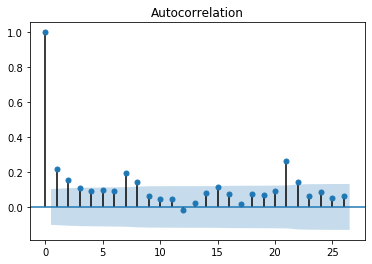

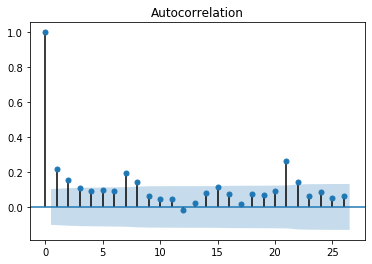

In [114]:
plot_acf(df) #identify the value of q

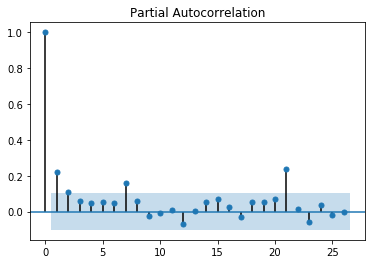

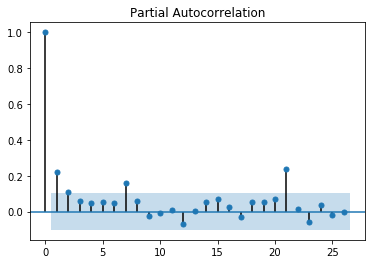

In [115]:
plot_pacf(df)  #identify the value of p

In [117]:
train=df[0:330]
test=df[330:]

In [119]:
train.size,test.size #p=2,3 d=0 q= 3,4

(330, 35)

In [120]:
from statsmodels.tsa.arima_model import ARIMA

In [123]:
model=ARIMA(train,order=(2,1,3))

In [124]:
model_fit=model.fit()

In [125]:
model_fit.aic

2230.948254271132

In [128]:
model_forecast=model_fit.forecast(steps=35)[0]

In [129]:
model_forecast

array([45.30368759, 46.3105886 , 43.64947622, 44.59220347, 46.49701503,
       44.34347849, 44.08985948, 46.34386502, 45.07533317, 43.88107493,
       45.95212042, 45.69574049, 43.97398968, 45.45672721, 46.10374039,
       44.31134452, 44.99233114, 46.26015703, 44.79344796, 44.66474084,
       46.18570356, 45.30635543, 44.53323021, 45.94668529, 45.74841678,
       44.60564598, 45.63338627, 46.04982532, 44.84524238, 45.33693761,
       46.18217491, 45.18585347, 45.12982951, 46.15764759, 45.55080382])

In [146]:
model_forecast.size,test.size

(35, 35)

In [136]:
model_forecast=pd.DataFrame(model_forecast)

In [141]:
type(test),type(model_forecast)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [151]:
test=test.reset_index(drop=False)

In [158]:
final_com=pd.concat([test,model_forecast],axis=1)

In [162]:
final_com.columns=['Date','Actual_Birth','Forecast_birth']

In [163]:
final_com.head()

,Date,Actual_Birth,Forecast_birth
0,1959-11-27,51,45.303688
1,1959-11-28,46,46.310589
2,1959-11-29,44,43.649476
3,1959-11-30,52,44.592203
4,1959-12-01,45,46.497015


In [168]:
final_com=final_com.set_index('Date')

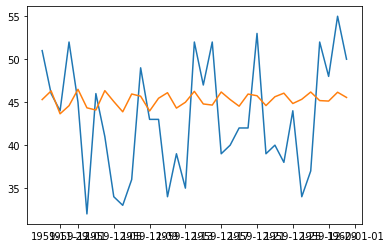

<Figure size 720x432 with 0 Axes>

In [172]:
plt.plot(final_com)
plt.figure(figsize=(10,6))
plt.show()